In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class NeuralN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = torch.tanh(output)
        output = output * self.w20
        return output

In [4]:
my_model=NeuralN()

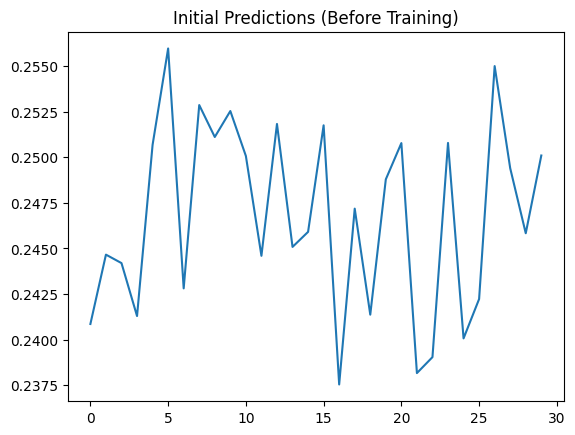

In [5]:
input_data = torch.rand(10, 3)  # Random input of size (10, 3)
predictions_before_training = my_model(input_data).detach().numpy()

# Visualize initial predictions
sns.lineplot(data=predictions_before_training.flatten())
plt.title('Initial Predictions (Before Training)')
plt.show()

In [6]:
simpleNN = NeuralN()

In [7]:
X = torch.linspace(start=1, end=2.5, steps=40)
X

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [8]:
Y = my_model(X)
Y

tensor([0.2571, 0.2578, 0.2586, 0.2593, 0.2600, 0.2607, 0.2614, 0.2621, 0.2628,
        0.2634, 0.2641, 0.2648, 0.2654, 0.2661, 0.2667, 0.2673, 0.2680, 0.2686,
        0.2692, 0.2698, 0.2704, 0.2710, 0.2716, 0.2722, 0.2727, 0.2733, 0.2739,
        0.2744, 0.2750, 0.2755, 0.2760, 0.2766, 0.2771, 0.2776, 0.2781, 0.2786,
        0.2791, 0.2796, 0.2801, 0.2806], grad_fn=<MulBackward0>)

In [9]:
newY=simpleNN(X)

In [10]:
newY

tensor([0.5206, 0.5214, 0.5221, 0.5229, 0.5236, 0.5243, 0.5249, 0.5255, 0.5262,
        0.5268, 0.5273, 0.5279, 0.5284, 0.5289, 0.5294, 0.5299, 0.5304, 0.5308,
        0.5313, 0.5317, 0.5321, 0.5325, 0.5329, 0.5332, 0.5336, 0.5339, 0.5343,
        0.5346, 0.5349, 0.5352, 0.5355, 0.5358, 0.5361, 0.5363, 0.5366, 0.5368,
        0.5371, 0.5373, 0.5375, 0.5377], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

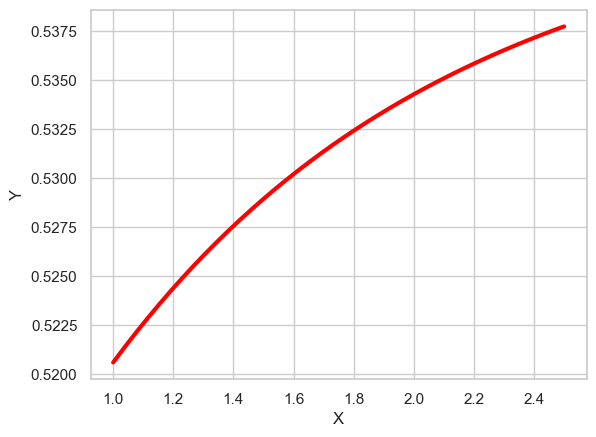

In [11]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=newY.detach(),
    color='red',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [12]:
optimizer = optim.SGD(simpleNN.parameters(), lr=0.01)
loss = nn.MSELoss()


In [13]:
for epoch in range(50):
    total_loss = 0

    for i in range(len(X)):
        input_i = X[i]
        actual_output_i = Y[i]

        pred_output_i = simpleNN(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        # Retain the graph for multiple backward passes
        loss_value.backward(retain_graph=True)

        total_loss += loss_value

    print('Epoch: ', epoch, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0  | Total Loss:  tensor(2.7311, grad_fn=<AddBackward0>)
Epoch:  1  | Total Loss:  tensor(0.2532, grad_fn=<AddBackward0>)
Epoch:  2  | Total Loss:  tensor(0.0241, grad_fn=<AddBackward0>)
Epoch:  3  | Total Loss:  tensor(0.0029, grad_fn=<AddBackward0>)
Epoch:  4  | Total Loss:  tensor(0.0010, grad_fn=<AddBackward0>)
Epoch:  5  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  6  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  7  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  8  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  9  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  10  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  11  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  12  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  13  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  14  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  15  | Total 

In [14]:
pred_y = simpleNN(X)
pred_y

tensor([0.2644, 0.2648, 0.2652, 0.2656, 0.2660, 0.2663, 0.2666, 0.2670, 0.2673,
        0.2676, 0.2679, 0.2681, 0.2684, 0.2687, 0.2689, 0.2692, 0.2694, 0.2696,
        0.2699, 0.2701, 0.2703, 0.2705, 0.2707, 0.2709, 0.2710, 0.2712, 0.2714,
        0.2715, 0.2717, 0.2719, 0.2720, 0.2722, 0.2723, 0.2724, 0.2726, 0.2727,
        0.2728, 0.2729, 0.2730, 0.2731], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

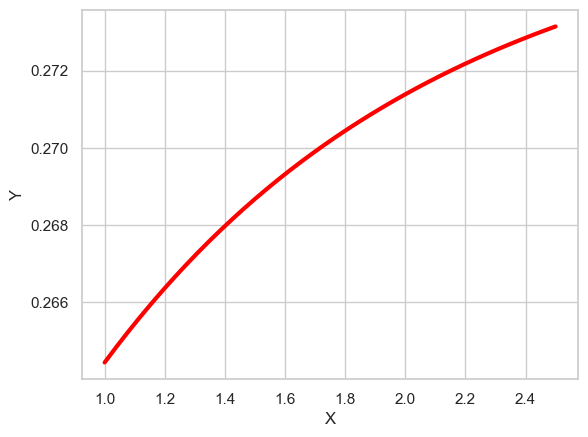

In [15]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=pred_y.detach(),
    color='red',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')